In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('NYC_Restaurants.csv')

In [3]:
df.shape
df.head(2)
df.iloc[0].T

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

<h2 align='center'>Answer 1</h2>

In [4]:
def restraunt_name(s,col_tbu=['DBA','BUILDING','STREET','ZIPCODE','BORO'],sep=' '):
    temp_lt=s[col_tbu].astype(str).to_list()
    nm=sep.join(temp_lt)
    return nm

In [5]:
df['RESTAURANT']=df.apply(restraunt_name,axis=1)

In [6]:
df['RESTAURANT'].iloc[:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

<h2 align='center'>Answer 2</h2>

In [7]:
df['RESTAURANT'].unique()
# df.drop_duplicates(subset=['RESTAURANT']).shape

array(["WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN",
       'TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS',
       'BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD 11369 QUEENS', ...,
       'NEW WORLD FAST FOOD 4021 MAIN ST 11354 QUEENS',
       'EARLY 967 MANHATTAN AVE 11222 BROOKLYN',
       'TESHIGOTOYA 432 E 13TH ST 10009 MANHATTAN'], dtype=object)

In [8]:
# pd.Series([i for i in df['RESTAURANT'] if 'subway' in i.lower()]).shape
# df['RESTAURANT'].drop_duplicates().shape
# pd.Series([i for i in df['RESTAURANT'].unique() if 'subway' in i.lower()]).shape
# pd.Series([i for i in df['RESTAURANT'] if 'subway' in i.lower()]).shape


<h2 align='center'>Answer 3</h2>


In [9]:
df['address']=df.apply(lambda s:restraunt_name(s,col_tbu=['BUILDING','STREET','ZIPCODE','BORO']),axis=1)

In [10]:
df[df['DBA'].str.lower().str.contains('subway')]['DBA'].unique()

array(["DUNKIN' DONUTS/SUBWAY", 'SUBWAY', 'SUBWAYS/FULLER DRUG STORE',
       "PAPA JOHN'S/SUBWAY", 'SUBWAY (STORE #27610)', 'SUBWAY SANDWICHES',
       'Subway', 'SUBWAY STORE 46555', 'SUBWAYS',
       'SUBWAY (Shopping Plaza)', 'SUBWAY (JAMAICA COLOSSEUM)', 'subway',
       'SUBWAY RESTAURANT', 'SUBWAY AND PIZZA'], dtype=object)

In [11]:
df['DBA'].value_counts()
df.groupby(df['DBA'].str.lower())['address'].agg(['nunique','size']).sort_values('size',ascending=False).reset_index()
df.groupby(df['DBA'].str.lower())['address'].nunique().sort_values(ascending=False).reset_index()#agg(['nunique','len'])


,DBA,address
0,subway,150
1,mcdonald's,80
2,starbucks coffee,78
3,dunkin donuts,71
4,dunkin' donuts,69
...,...,...
8762,fulton street bagels,1
8763,full moon cafe,1
8764,full doe bakery,1
8765,fuleen seafood restaurant,1


In [12]:
df['dba']=df['DBA'].str.upper()# in order to verify subway == Subway or subWAY
df_chain=df[['dba','address']].dropna().drop_duplicates()['dba'].value_counts().to_frame('num_of_chains')
df_chain[df_chain['num_of_chains']>1].shape

(386, 1)

<h3>Ans= 386</h3>

<h2 align='center'>Answer 4</h2>


<AxesSubplot:ylabel='Number of Restraunts/Popularity'>

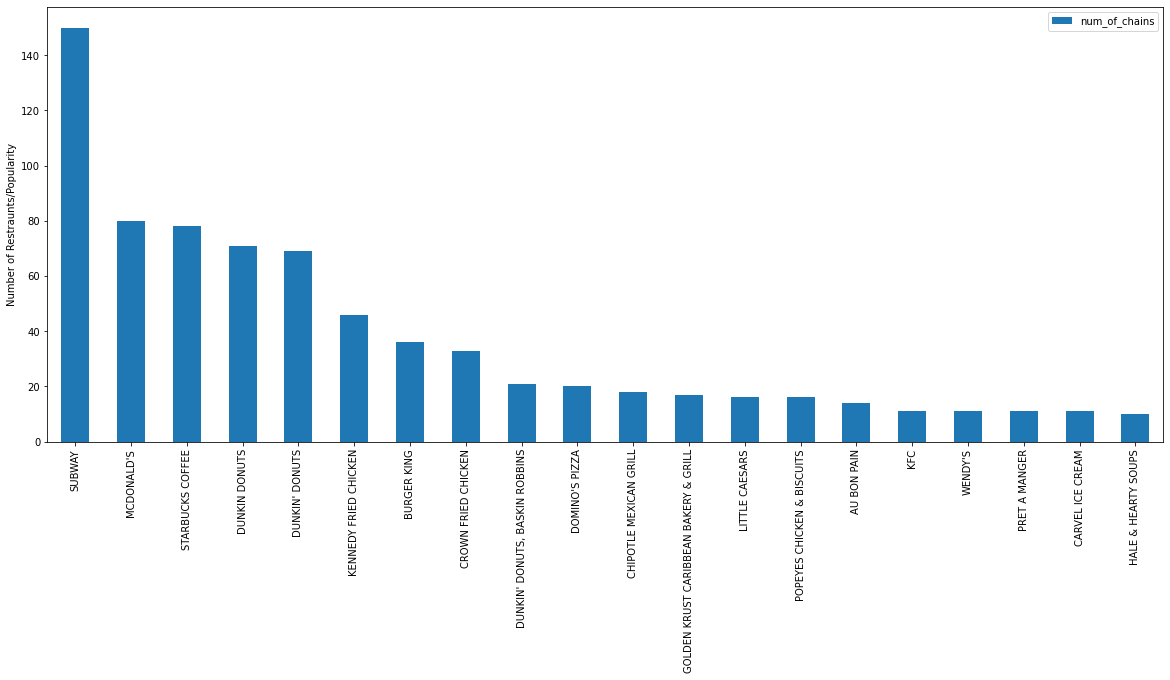

In [13]:
df_chain.iloc[:20].plot(kind='bar',figsize=(20,8),ylabel='Number of Restraunts/Popularity')
#df_chain is already sorted by value_count function

<h2 align='center'>Answer 5</h2>


In [14]:
chain_res=df_chain[df_chain['num_of_chains']>1].index.to_list()
len(set(chain_res))==len(chain_res)
len(chain_res)

386

In [15]:
def chain_mask(nm):
    if nm.upper() in chain_res:
        return True
    else:
        return False

In [16]:
mask_1=df['DBA'].map(chain_mask)

df1=df[mask_1][['BORO','RESTAURANT']].drop_duplicates()
df1.shape[0]


1733

In [17]:
df1['RESTAURANT'].nunique()/df['RESTAURANT'].nunique()

0.17134664821040144

<h3 >Ans=0.1713 </h3>

<h2 align='center'>Answer 6</h2>


In [18]:
non_chain_res=df_chain[df_chain['num_of_chains']==1].index.to_list()
len(non_chain_res)

8381

In [19]:
df['BORO'].value_counts()
df['BORO'].replace({'Missing':np.nan},inplace=True)# There is no Boro named missing, we need to avoid these in our analysis
df['BORO'].value_counts()



MANHATTAN        17943
BROOKLYN         11141
QUEENS           10513
BRONX             3465
STATEN ISLAND     1542
Name: BORO, dtype: int64

In [20]:
def non_chain_mask(nm):
    if nm.upper() in non_chain_res:
        return True
    else:
        return False

In [21]:
mask_1=df['DBA'].map(non_chain_mask)

df_boro_non_chain=df[mask_1][['BORO','RESTAURANT']].drop_duplicates()

df_boro_non_chain.isna().sum()

BORO          5
RESTAURANT    0
dtype: int64

<AxesSubplot:>

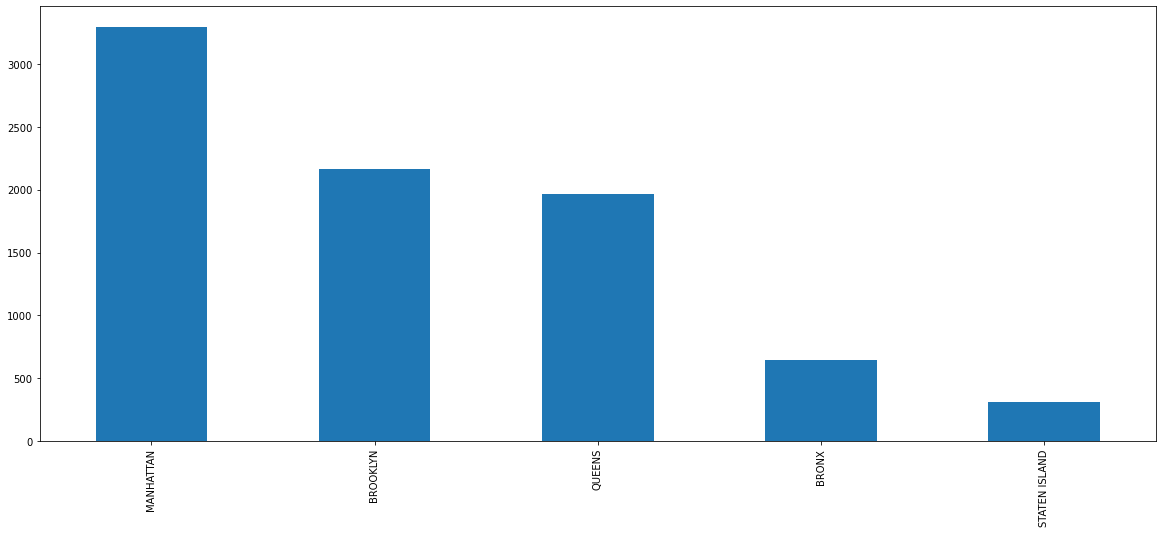

In [22]:
df_boro_non_chain['BORO'].value_counts().plot(kind='bar',figsize=(20,8))

<h2 align='center'>Answer 7</h2>


In [23]:
df_boro_res=df[['BORO','RESTAURANT']].drop_duplicates()
df_boro_res.shape

(10114, 2)

<AxesSubplot:>

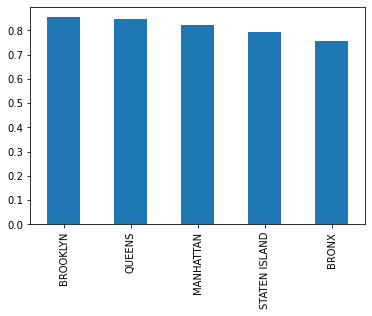

In [24]:
df_boro_non_chain_frac=df_boro_non_chain['BORO'].value_counts()/df_boro_res['BORO'].value_counts()
df_boro_non_chain_frac.sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

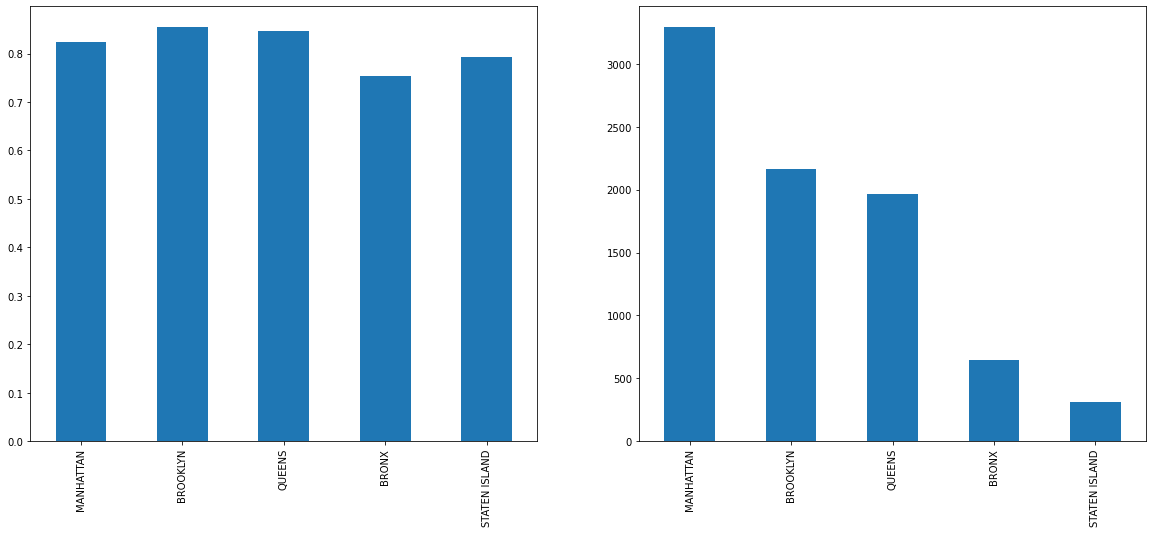

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_boro_non_chain_frac.plot(kind='bar',ax=ax[0])
df_boro_non_chain['BORO'].value_counts().plot(kind='bar',ax=ax[1])

In [26]:
pd.concat([df_boro_non_chain['BORO'].value_counts().to_frame('Independent count')\
           ,df_boro_non_chain_frac.to_frame('Independent FRAC')],axis=1)

,Independent count,Independent FRAC
MANHATTAN,3292,0.822794
BROOKLYN,2161,0.854488
QUEENS,1966,0.847049
BRONX,645,0.754386
STATEN ISLAND,312,0.791878


<h4>Ans =
Manhattan has the most number of independent restaurants , whereas Brooklyn has highest fraction of independent restraunts</h4>

<h2 align='center'>Answer 8</h2>


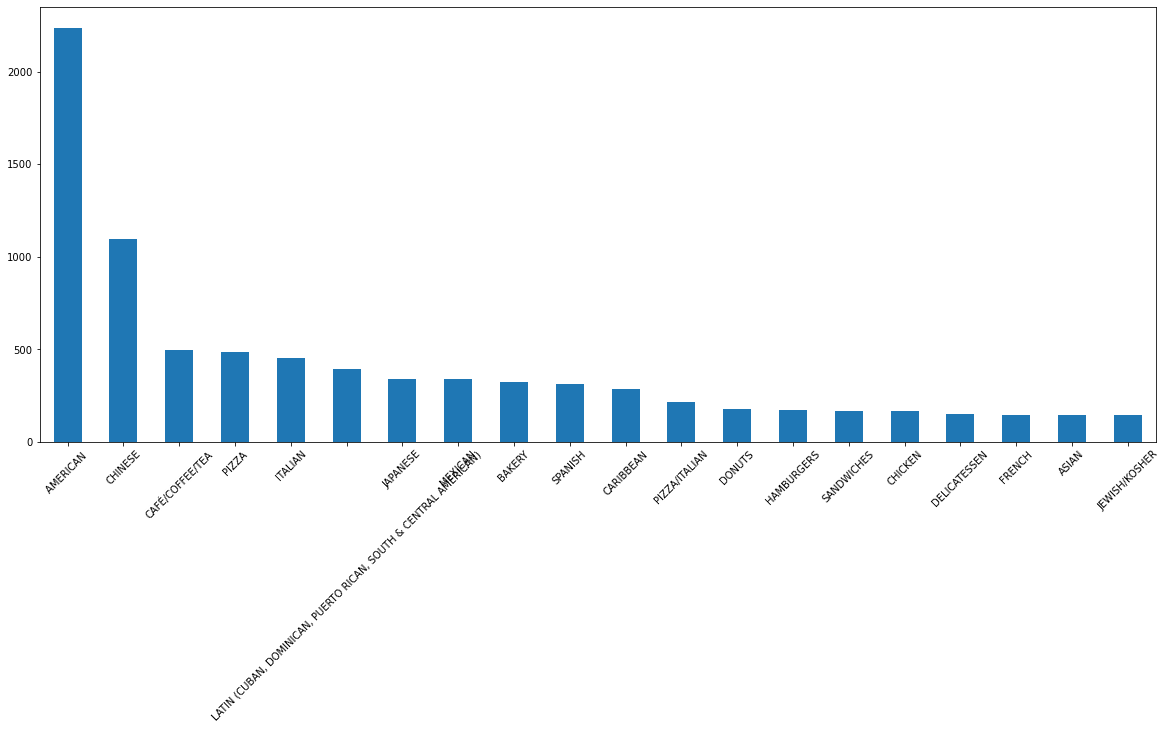

In [27]:
df['cuisine']=df['CUISINE DESCRIPTION'].str.upper()
df1=df[['cuisine','RESTAURANT']].drop_duplicates()
df1.shape

df1['cuisine'].value_counts()[:20].plot(kind='bar',figsize=(20,8),rot=45)

df_all_cuisine=df1['cuisine'].value_counts().to_frame('num_restaurants')

<h2 align='center'>Answer 9</h2>


In [28]:
df.columns
df[[i for i in df.columns if 'violation' in i.lower()]+['ACTION']]
#Nan violation code and no violation description for clean/no violation actions

,VIOLATION CODE,VIOLATION DESCRIPTION,ACTION
0,06C,Food not protected from potential source of co...,Violations were cited in the following area(s).
1,10F,Non-food contact surface improperly constructe...,Violations were cited in the following area(s).
2,04H,"Raw, cooked or prepared food is adulterated, c...",Violations were cited in the following area(s).
3,06A,Personal cleanliness inadequate. Outer garment...,Violations were cited in the following area(s).
4,10F,Non-food contact surface improperly constructe...,Violations were cited in the following area(s).
...,...,...,...
44628,NaN,NaN,No violations were recorded at the time of thi...
44629,NaN,NaN,No violations were recorded at the time of thi...
44630,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).
44631,08A,Facility not vermin proof. Harborage or condit...,Violations were cited in the following area(s).


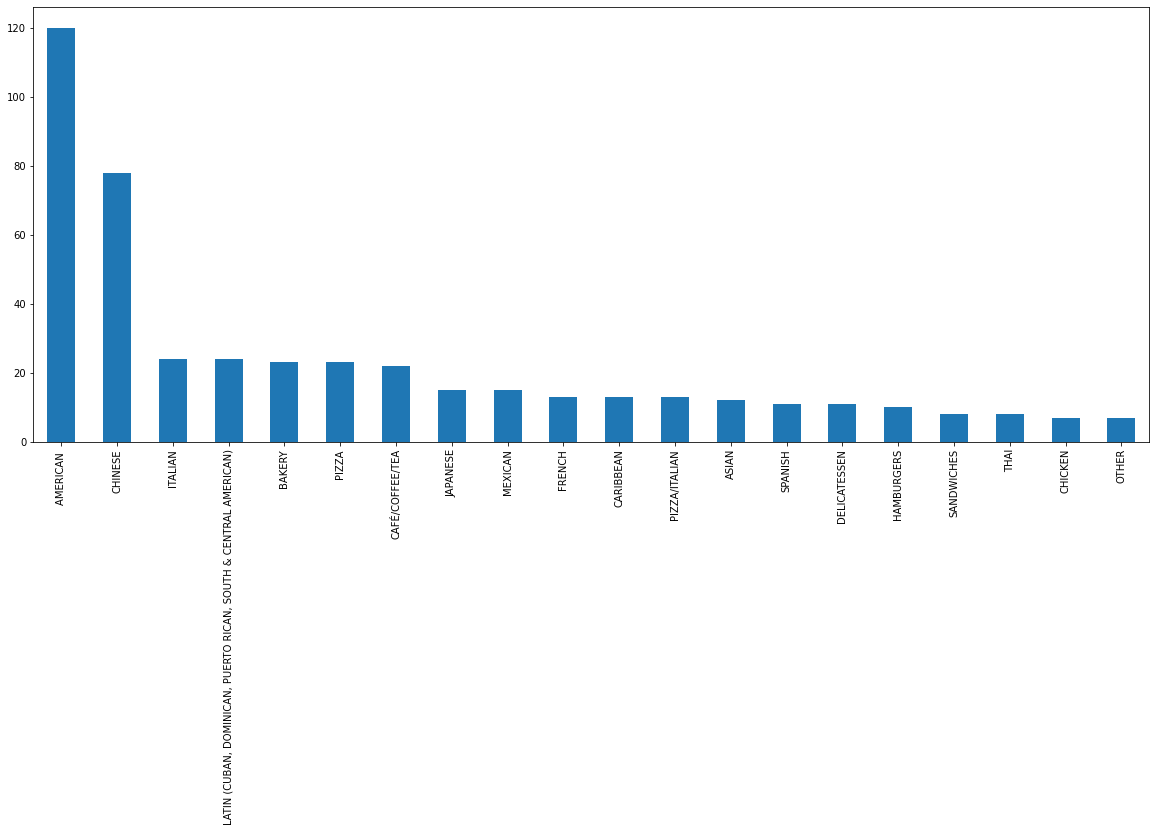

In [29]:
df_clean=df[df['VIOLATION CODE'].isna()]
df_temp=df_clean[['cuisine','RESTAURANT']].drop_duplicates()

df_temp['cuisine'].value_counts()[:20].plot(kind='bar',figsize=(20,8))#,rot=-30)

df_clean_cuisine=df_temp['cuisine'].value_counts().to_frame('num_restaurants')


<h2 align='center'>Answer 10</h2>


In [30]:
res_tbu=df_all_cuisine[df_all_cuisine['num_restaurants']>=20].index
res_tbu

Index(['AMERICAN ', 'CHINESE', 'CAFÉ/COFFEE/TEA', 'PIZZA', 'ITALIAN',
       'LATIN (CUBAN, DOMINICAN, PUERTO RICAN, SOUTH & CENTRAL AMERICAN)',
       'JAPANESE', 'MEXICAN', 'BAKERY', 'SPANISH', 'CARIBBEAN',
       'PIZZA/ITALIAN', 'DONUTS', 'HAMBURGERS', 'SANDWICHES', 'CHICKEN',
       'DELICATESSEN', 'FRENCH', 'ASIAN', 'JEWISH/KOSHER', 'INDIAN', 'THAI',
       'KOREAN', 'SANDWICHES/SALADS/MIXED BUFFET', 'OTHER',
       'JUICE, SMOOTHIES, FRUIT SALADS', 'MEDITERRANEAN', 'MIDDLE EASTERN',
       'ICE CREAM, GELATO, YOGURT, ICES', 'IRISH', 'BAGELS/PRETZELS',
       'TEX-MEX', 'GREEK', 'SEAFOOD', 'VEGETARIAN', 'RUSSIAN', 'STEAK',
       'TURKISH', 'CHINESE/JAPANESE', 'VIETNAMESE/CAMBODIAN/MALAYSIA',
       'PERUVIAN', 'AFRICAN',
       'BOTTLED BEVERAGES, INCLUDING WATER, SODAS, JUICES, ETC.',
       'EASTERN EUROPEAN', 'SOUL FOOD', 'CONTINENTAL', 'SOUPS & SANDWICHES',
       'BARBECUE', 'BANGLADESHI'],
      dtype='object')

In [31]:
# df_clean_cuisine.loc[res_tbu,'num_restaurants']
df_temp=df_clean_cuisine[df_clean_cuisine.index.isin(res_tbu)]

df_ratio=df_temp['num_restaurants']/df_all_cuisine['num_restaurants']

df_ratio.sort_values(ascending=False).iloc[:10]#Top ten cuisines wrt ratio of clean to tatal number of restaurants

BANGLADESHI                      0.150000
RUSSIAN                          0.111111
PERUVIAN                         0.107143
SOUPS & SANDWICHES               0.095238
CONTINENTAL                      0.095238
BARBECUE                         0.095238
VIETNAMESE/CAMBODIAN/MALAYSIA    0.093750
SOUL FOOD                        0.090909
FRENCH                           0.089041
TEX-MEX                          0.086207
Name: num_restaurants, dtype: float64

<h2 align='center'>Answer 11</h2>


In [32]:
df1=df.groupby(['BORO','VIOLATION DESCRIPTION'])['Unnamed: 0'].count().to_frame('ct_violations').unstack(level=-1)
df1=pd.pivot_table(df,index='BORO',columns=['VIOLATION DESCRIPTION'],aggfunc=len).fillna(0)#.sort_values('BRONX',axis=1,ascending=False)

df1.columns = df1.columns.get_level_values(1)
df1

VIOLATION DESCRIPTION,"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,''''Wash hands sign not posted at hand wash facility.,"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",Accurate thermometer not provided in refrigerated or hot holding equipment.,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",Ashtray present in smoke-free area.,"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.","Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.","Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",...,"Smoke free workplace smoking policy inadequate, not posted, not provided to employees.",Thawing procedures improper.,"The original nutritional fact labels and/or ingredient label for a cooking oil, shortening or margarine or food item sold in bulk, or acceptable manufacturers documentation not maintained on site.","Tobacco use, eating, or drinking from open container in food preparation, food storage or dishwashing area observed.","Toilet facility not maintained and provided with toilet paper, waste receptacle and self-closing door.",Toilet facility not provided for employees or for patrons when required.,Toilet facility used by women does not have at least one covered garbage receptacle.,"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",Unprotected food re-served.,Wiping cloths soiled or not stored in sanitizing solution.
BORO,,,,,,,,,,,,,,,,,,,,,
BRONX,12.0,1.0,21.0,5.0,21.0,27.0,4.0,20.0,0.0,0.0,...,45.0,36.0,48.0,22.0,46.0,2.0,1.0,2.0,1.0,47.0
BROOKLYN,40.0,5.0,57.0,12.0,76.0,120.0,4.0,93.0,4.0,0.0,...,222.0,109.0,125.0,55.0,142.0,3.0,5.0,8.0,0.0,198.0
MANHATTAN,49.0,6.0,93.0,19.0,98.0,162.0,5.0,168.0,6.0,0.0,...,264.0,151.0,198.0,107.0,225.0,11.0,7.0,15.0,1.0,285.0
QUEENS,29.0,4.0,60.0,24.0,92.0,85.0,8.0,80.0,5.0,1.0,...,154.0,100.0,151.0,64.0,134.0,3.0,2.0,20.0,0.0,168.0
STATEN ISLAND,5.0,1.0,8.0,3.0,16.0,17.0,1.0,10.0,1.0,0.0,...,22.0,23.0,25.0,7.0,14.0,1.0,1.0,3.0,0.0,25.0


In [33]:
df1.apply(lambda s: s.idxmax(),axis=1).to_frame('most_frequent_violation')

,most_frequent_violation
BORO,
BRONX,Non-food contact surface improperly constructe...
BROOKLYN,Non-food contact surface improperly constructe...
MANHATTAN,Non-food contact surface improperly constructe...
QUEENS,Non-food contact surface improperly constructe...
STATEN ISLAND,Non-food contact surface improperly constructe...


<h2 align='center'>Answer 12</h2>


In [34]:
df1#From previous question

Violation_freq=df1.sum()
Violation_freq
normalized_df1=df1.divide(Violation_freq,axis=1)

normalized_df1

VIOLATION DESCRIPTION,"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,''''Wash hands sign not posted at hand wash facility.,"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",Accurate thermometer not provided in refrigerated or hot holding equipment.,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",Ashtray present in smoke-free area.,"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.","Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.","Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",...,"Smoke free workplace smoking policy inadequate, not posted, not provided to employees.",Thawing procedures improper.,"The original nutritional fact labels and/or ingredient label for a cooking oil, shortening or margarine or food item sold in bulk, or acceptable manufacturers documentation not maintained on site.","Tobacco use, eating, or drinking from open container in food preparation, food storage or dishwashing area observed.","Toilet facility not maintained and provided with toilet paper, waste receptacle and self-closing door.",Toilet facility not provided for employees or for patrons when required.,Toilet facility used by women does not have at least one covered garbage receptacle.,"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",Unprotected food re-served.,Wiping cloths soiled or not stored in sanitizing solution.
BORO,,,,,,,,,,,,,,,,,,,,,
BRONX,0.088889,0.058824,0.087866,0.079365,0.069307,0.065693,0.181818,0.053908,0.0000,0.0,...,0.063649,0.085919,0.087751,0.086275,0.081996,0.10,0.0625,0.041667,0.5,0.065007
BROOKLYN,0.296296,0.294118,0.238494,0.190476,0.250825,0.291971,0.181818,0.250674,0.2500,0.0,...,0.314003,0.260143,0.228519,0.215686,0.253119,0.15,0.3125,0.166667,0.0,0.273859
MANHATTAN,0.362963,0.352941,0.389121,0.301587,0.323432,0.394161,0.227273,0.452830,0.3750,0.0,...,0.373409,0.360382,0.361974,0.419608,0.401070,0.55,0.4375,0.312500,0.5,0.394191
QUEENS,0.214815,0.235294,0.251046,0.380952,0.303630,0.206813,0.363636,0.215633,0.3125,1.0,...,0.217822,0.238663,0.276051,0.250980,0.238859,0.15,0.1250,0.416667,0.0,0.232365
STATEN ISLAND,0.037037,0.058824,0.033473,0.047619,0.052805,0.041363,0.045455,0.026954,0.0625,0.0,...,0.031117,0.054893,0.045704,0.027451,0.024955,0.05,0.0625,0.062500,0.0,0.034578


In [35]:
normalized_df1.idxmax(axis=1).to_frame('most_freq_norm_violation')

,most_freq_norm_violation
BORO,
BRONX,Unprotected food re-served.
BROOKLYN,Precooked potentially hazardous food from comm...
MANHATTAN,Out-of package sale of tobacco products observed.
QUEENS,Caloric content range (minimum to maximum) not...
STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po..."


<h2 align='center'>Answer 13</h2>


In [36]:
import re

def gen_phone(e):
    e=str(e)
    e=re.sub(r'[\D]','',e)
    
    if len(e)>=3:
        return e[:3] #int(e[:3])
    else: return np.nan
    

# df['area_code']=df['PHONE'].map(lambda e : try str(e)[:3] except np.nan)# if type(e)==type(1) else np.nan)
df['area_code']=df['PHONE'].map(gen_phone)
# df['PHONE'].map(lambda e : type(int(e))==int)

In [37]:
df[df['area_code'].isna()]#.sum()
df_temp=df.dropna(subset=['area_code'])

In [38]:
# df_temp.loc[:,'area_code']=df_temp['area_code'].astype(int)

In [39]:
df_temp=df_temp[['area_code','ZIPCODE']].drop_duplicates()
dff=df_temp['area_code'].value_counts().to_frame('freq')
area_code_with_only_1ZipCode=dff[dff.freq==1].index.to_list()

In [40]:
area_code_with_only_1ZipCode

['404',
 '615',
 '610',
 '281',
 '502',
 '728',
 '410',
 '191',
 '964',
 '626',
 '607',
 '702',
 '202',
 '171',
 '860',
 '175',
 '985',
 '434',
 '908',
 '605',
 '617',
 '570',
 '206',
 '303',
 '855',
 '970',
 '000',
 '905',
 '612',
 '505',
 '305',
 '716',
 '412',
 '954']

<h2 align='center'>Answer 14</h2>


In [42]:
df['STREET TYPE']=df['STREET'].map(lambda s: str(s).split(' ')[-1])
df['STREET BASE']=df['STREET'].map(lambda s: ' '.join(str(s).split(' ')[:-1]))

df[[i for i in df.columns if 'street' in i.lower()]]

,STREET,STREET TYPE,STREET BASE
0,FLATBUSH AVENUE,AVENUE,FLATBUSH
1,FLATBUSH AVENUE,AVENUE,FLATBUSH
2,FLATBUSH AVENUE,AVENUE,FLATBUSH
3,FLATBUSH AVENUE,AVENUE,FLATBUSH
4,FLATBUSH AVENUE,AVENUE,FLATBUSH
...,...,...,...
44628,MANHATTAN AVE,AVE,MANHATTAN
44629,E 13TH ST,ST,E 13TH
44630,E 13TH ST,ST,E 13TH
44631,E 13TH ST,ST,E 13TH


In [52]:
df['STREET BASE & ZIP']=df['STREET BASE'] + ' ' +df['ZIPCODE'].astype(str)
df[[i for i in df.columns if 'street' in i.lower()]].head(2)

,STREET,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,FLATBUSH AVENUE,AVENUE,FLATBUSH,FLATBUSH 11225
1,FLATBUSH AVENUE,AVENUE,FLATBUSH,FLATBUSH 11225


In [64]:
tbu=['STREET TYPE','STREET BASE','STREET BASE & ZIP']
df1=df[tbu]


df1[df1['STREET BASE'].map(len)==0]#BROADWAY

df1=df1[df1['STREET BASE'].map(len)!=0]
df1=df1.drop_duplicates()

In [74]:
df_merged=df1.merge(df1,how='inner',on='STREET BASE & ZIP',suffixes=['_st1','_st2'])

df_two_streets=df_merged[df_merged['STREET TYPE_st1']!=df_merged['STREET TYPE_st2']]
# df_merged.shape,df1.shape
df_two_streets

,STREET TYPE_st1,STREET BASE_st1,STREET BASE & ZIP,STREET TYPE_st2,STREET BASE_st2
2,ROAD,63,63 11374,DRIVE,63
3,DRIVE,63,63 11374,ROAD,63
9,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH
10,AVE,CHURCH,CHURCH 11218,AVENUE,CHURCH
15,WEST,PROSPECT PARK,PROSPECT PARK 11215,W,PROSPECT PARK
...,...,...,...,...,...
4187,AVENUE,SAINT NICHOLAS,SAINT NICHOLAS 10040,AVE,SAINT NICHOLAS
4195,AVENUE,DITMAS,DITMAS 11218,AVE,DITMAS
4196,AVE,DITMAS,DITMAS 11218,AVENUE,DITMAS
4214,STREET,48,48 11101,AVENUE,48


In [110]:
df_cross=pd.crosstab(df_two_streets['STREET TYPE_st1'],df_two_streets['STREET TYPE_st2'])#,aggfunc=len)

In [111]:
df_cross.loc['AVE','AVENUE']


152

In [116]:
to_find=['AVE','ST','RD','PL','BOULEARD','BULEVARD']
df_cross.idxmax(axis=1)[to_find]

STREET TYPE_st1
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object